# WNBA

The data set is about basketball players in WNBA (Women's National Basketball Association), and contains general information about players, along with their metrics for the season 2016-2017. The data set was put together by Thomas De Jonghe, and can be downloaded from Kaggle, where you can also find useful documentation for the data set.

## Overview

In [103]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

wnba = pd.read_csv('wnba.csv')

In [2]:
print(wnba.head())

              Name Team  Pos  Height  Weight        BMI Birth_Place  \
0    Aerial Powers  DAL    F     183    71.0  21.200991          US   
1      Alana Beard   LA  G/F     185    73.0  21.329438          US   
2     Alex Bentley  CON    G     170    69.0  23.875433          US   
3  Alex Montgomery  SAN  G/F     185    84.0  24.543462          US   
4     Alexis Jones  MIN    G     175    78.0  25.469388          US   

           Birthdate  Age         College  ... OREB  DREB  REB  AST  STL  BLK  \
0   January 17, 1994   23  Michigan State  ...    6    22   28   12    3    6   
1       May 14, 1982   35            Duke  ...   19    82  101   72   63   13   
2   October 27, 1990   26      Penn State  ...    4    36   40   78   22    3   
3  December 11, 1988   28    Georgia Tech  ...   35   134  169   65   20   10   
4     August 5, 1994   23          Baylor  ...    3     9   12   12    7    0   

   TO  PTS  DD2  TD3  
0  12   93    0    0  
1  40  217    0    0  
2  24  218    0  

In [3]:
print(wnba.tail())

                 Name Team  Pos  Height  Weight        BMI Birth_Place  \
138     Tiffany Hayes  ATL    G     178    70.0  22.093170          US   
139   Tiffany Jackson   LA    F     191    84.0  23.025685          US   
140  Tiffany Mitchell  IND    G     175    69.0  22.530612          US   
141      Tina Charles   NY  F/C     193    84.0  22.550941          US   
142     Yvonne Turner  PHO    G     175    59.0  19.265306          US   

              Birthdate  Age         College  ... OREB  DREB  REB  AST  STL  \
138  September 20, 1989   27     Connecticut  ...   28    89  117   69   37   
139      April 26, 1985   32           Texas  ...    5    18   23    3    1   
140  September 23, 1984   32  South Carolina  ...   16    70   86   39   31   
141        May 12, 1988   29     Connecticut  ...   56   212  268   75   21   
142    October 13, 1987   29        Nebraska  ...   11    13   24   30   18   

     BLK  TO  PTS  DD2  TD3  
138    8  50  467    0    0  
139    3   8   28   

In [4]:
print(wnba.shape)

(143, 32)


## Sampling

In [5]:
# maximum number of games played by a player in the season 2016-2017
parameter = wnba["Games Played"].max()
parameter

32

In [6]:
#sample randomly 30 players from the population
sample = wnba["Games Played"].sample(30, random_state = 1)
sample

78     30
116    29
31     26
5      14
125    28
45     20
14      4
44     28
73     14
89     20
130    25
53     20
85     30
93     27
29     29
16     20
35      7
90      9
83     29
19     29
40     30
92     30
122    29
98     30
59     29
42     28
33     30
99     24
69     29
97     21
Name: Games Played, dtype: int64

In [7]:
#maximum number of games using the sample
statistic = sample.max()
statistic

30

In [8]:
#Measure the sampling error
sampling_error = parameter - statistic
sampling_error

2

When we sample we want to minimize the sampling error as much as possible. We want our sample to mirror the population as closely as possible.

If we sampled to measure the mean height of adults in the US, we'd like our sample statistic (sample mean height) to get as close as possible to the population's parameter (population mean height). For this to happen, we need the individuals in our sample to form a group that is similar in structure with the group forming the population.

The US adult population is diverse, made of people of various heights. If we sampled 100 individuals from various basketball teams, then we'd almost certainly get a sample whose structure is significantly different than that of the population. As a consequence, we should expect a large sampling error (a large discrepancy between our sample's statistic (sample mean height) and the population's parameter (population mean height)).

In statistical terms, we want our samples to be representative of their corresponding populations. If a sample is representative, then the sampling error is low. The more representative a sample is, the smaller the sampling error. The less representative a sample is, the greater the sampling error.

To make our samples representative, we can try to give every individual in the population an equal chance to be selected in our samples. We want a very tall individual to have the same chance as being selected as an individual having a medium or short height. To give every individual an equal chance of being picked, we need to sample randomly - using a simple stratified sample

### Simple Random Sampling

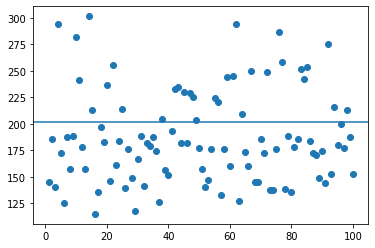

In [9]:
#visualize the discrepancy between a parameter and its corresponding statistics in the case of simple random sampling

sample_means = []
population_mean = wnba["PTS"].mean()

for x in range(100):
        sample = wnba["PTS"].sample(10, random_state = x)
        sample_means.append(sample.mean())
        
plt.scatter(x = range(1,101), y = sample_means)
plt.axhline(population_mean)

We can notice that the sample means vary a lot around the population mean. With a minimum sample mean of 115 points, a maximum of 301.4, and a population mean of roughly 201.8, we can tell that the sampling error is quite large for some of the cases.

Because sample means vary a lot around the population mean, there's a good chance we get a sample that is not representative of the population.

This problem can be solved by increasing the sample size. As we increase the sample size, the sample means vary less around the population mean, and the chances of getting an unrepresentative sample decrease.


Because simple random sampling is entirely random, it can leave out certain population individuals that are of great interest to some of the questions we may have.

For example, players in basketball play in different positions on the court. The metrics of a player (number of points, number of assists, etc.) depend on their position, and we might want to analyze the patterns for each individual position. If we perform simple random sampling, there's a chance that some categories won't be included in our sample. In other words, it's not guaranteed that we'll have a representative sample that has observations for every position we want to analyze.

In [10]:
print(wnba['Pos'].unique())

['F' 'G/F' 'G' 'C' 'F/C']


There are five unique positions in our data set.

### Stratified Sampling
To ensure we end up with a sample that has observations for all the categories of interest, we can change the sampling method. We can organize our data set into different groups, and then do simple random sampling for every group. We can group our data set by player position, and then sample randomly from each group.

This sampling method is called stratified sampling, and each stratified group is also known as a stratum.

In [11]:
#new column which describes the number of points a player scored per game during the season
wnba["Pts_per_game"] = wnba["PTS"] / wnba["Games Played"]

# Stratifying the data in five strata
stratum_G = wnba[wnba.Pos == 'G']
stratum_F = wnba[wnba.Pos == 'F']
stratum_C = wnba[wnba.Pos == 'C']
stratum_GF = wnba[wnba.Pos == 'G/F']
stratum_FC = wnba[wnba.Pos == 'F/C']

points_per_position = {}
for stratum, position in [(stratum_G, 'G'), (stratum_F, 'F'), (stratum_C, 'C'),
                (stratum_GF, 'G/F'), (stratum_FC, 'F/C')]:
    sample = stratum["Pts_per_game"].sample(10, random_state = 0)
    # simple random sapling on each stratum
    points_per_position[position] = sample.mean()
    
#Find the position that has the greatest number of points per game
position_most_points = max(points_per_position, key = points_per_position.get)
position_most_points

'C'

Earlier we performed simple random sampling 100 times on the original data set, and for each sample we computed the mean number of total points a player scores in a season. The problem is that the number of total points is influenced by the number of games played, which ranges from 2 to 32.

In [12]:
print(wnba['Games Played'].min())

2


In [13]:
print(wnba['Games Played'].max())

32


In [14]:
print(wnba['Games Played'].value_counts(bins = 3, normalize = True) * 100)

(22.0, 32.0]     72.727273
(12.0, 22.0]     18.181818
(1.969, 12.0]     9.090909
Name: Games Played, dtype: float64


Approximately 72.7% of the players had more than 23 games for the 2016-2017 season, which means that the mean of the total points is probably influenced by this category of players who played a lot of games.

The ( character indicates that the beginning of the interval is not included, and the ] indicates that the endpoint is included. For example, (22.0, 32.0] means that 22.0 isn't included, while 32.0 is, and the interval contains this array of numbers: [23, 24, 25, 26, 27, 28, 29, 30, 31, 32].

When we compute the mean of the total points using the population (the entire data set), the mean will probably be signficantly influenced by those 72.7% players who played more than 23 games. However, when we sample randomly, we can end up with a sample where the proportions are different than in the population.

For instance, we might end up with a sample where only 2% of the players played more than 23 games. This will result in a sample mean which underestimates the population mean. Or we could have a sample where more than 95% of the players had 23 games in the 2016-2017 season. This will result in overestimating the population mean. This scenario of under or over estimation is common for small samples.

One solution to this problem is to use stratified sampling while being mindful of the proportions in the population. We can stratify our data set by the number of games played, and then sample randomly from each stratum a proportional number of observations.

### Stratified Sampling - Proportionally based on games played

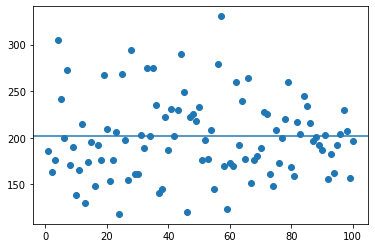

In [15]:
#Perform stratified sampling on the data set 100 times, and sample strata proportionally.

#stratums for sampling
stratum_1 = wnba[wnba['Games Played'] <= 12]
stratum_2 = wnba[(wnba['Games Played'] > 12) & (wnba['Games Played'] <= 22)]
stratum_3 = wnba[wnba['Games Played'] > 22]

proportional_sampling_means = []

#get samples
for i in range(100):
    sample1 = stratum_1['PTS'].sample(1, random_state = i)
    sample2 = stratum_2['PTS'].sample(2, random_state = i)
    sample3 = stratum_3['PTS'].sample(7, random_state = i)
    
    #mergre samples into one
    final_sample = pd.concat([sample1, sample2, sample3])
    
    # add sample back into empty list
    proportional_sampling_means.append(final_sample.mean())

#plot the sample means
plt.scatter(range(1,101), proportional_sampling_means)
plt.axhline(wnba['PTS'].mean())

The variability of the sampling was quite large, and many sample means were unrepresentative, being far from the population mean. In fact, this sampling method doesn't seem to perform better than simple random sampling.

The poor performance is caused by a bad choice of strata. We stratified the data by the number of games played, but this isn't a good approach. A player is considered as having played one game even if she only played for one or two minutes. But others play 30 or 40 minutes, and they're still considered as having played one game.

It makes more sense to stratify the data by number of minutes played, rather than by number of games played. The minutes played are a much better indicator of how much a player scored in a season than the number of games played.

Our data set contains the total amount of minutes a player had for the entire season. If we make strata based on minutes played, and then sample proportionally using stratified sampling, we get something visibly better than simple random sampling (especially in terms of variability).

Here are a few guidelines for choosing good strata:

1. Minimize the variability within each stratum.

       For instance, avoid having in the same stratum a player that has scored 10 points and a player that has scored 500. If the variability is high, it might be a sign that you either need a more granular stratification (need more strata), or you need to change the criterion of stratification (an example of criterion is minutes played).

2. Maximize the variability between strata.

       Good strata are different from one another. If you have strata that are similar to one another with respect to what you want to measure, you might need a more granular stratification, or to change the stratification criterion. Previously , stratifying the data by games played resulted in strata that weren't too different from each other with respect to the distribution of the total points. We managed to increase the variability between strata by changing the criterion of stratification to minutes played.

3. The stratification criterion should be strongly correlated with the property you're trying to measure.

       For instance, the column describing minutes played (the criterion) should be strongly correlated with the number of total points (property we want to measure).

In [16]:
# Minutes played column
wnba['MIN'].value_counts(bins = 3, normalize = True)

(347.333, 682.667]    0.349650
(10.993, 347.333]     0.335664
(682.667, 1018.0]     0.314685
Name: MIN, dtype: float64

### Stratified Sampling - Proportionally based on minutes played

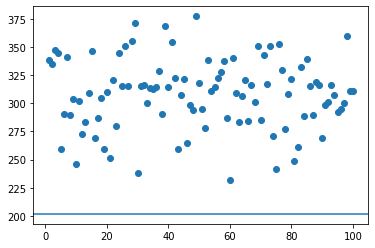

In [17]:
#stratums for sampling
stratum_1 = wnba[wnba['MIN'] <= 347]
stratum_2 = wnba[(wnba['MIN'] > 347) & (wnba['MIN'] <= 682)]
stratum_3 = wnba[wnba['MIN'] > 682]

proportional_sampling_means = []

#get samples
for i in range(100):
    sample1 = stratum_1['PTS'].sample(1, random_state = i)
    sample2 = stratum_2['PTS'].sample(2, random_state = i)
    sample3 = stratum_3['PTS'].sample(7, random_state = i)
    
    #mergre samples into one
    final_sample = pd.concat([sample1, sample2, sample3])
    
    # add sample back into empty list
    proportional_sampling_means.append(final_sample.mean())

#plot the sample means
plt.scatter(range(1,101), proportional_sampling_means)
plt.axhline(wnba['PTS'].mean())

Here we can see if we choose the minutes played for our stratum sample all our samples fall above the mean.

### Cluster Sampling

Assuming that all the teams in our data set have a website where we can take data from, we end up with this list of clusters (each team's website is considered a cluster).

In [18]:
print(wnba['Team'].unique())

['DAL' 'LA' 'CON' 'SAN' 'MIN' 'SEA' 'PHO' 'CHI' 'WAS' 'NY' 'ATL' 'IND']


Then we need to find a way to pick randomly a few clusters from our listing. There are many ways to do that, but the important thing to keep in mind is that we should avoid picking a cluster twice. Here's one way to sample four clusters randomly:

In [19]:
print(pd.Series(wnba['Team'].unique()).sample(4, random_state = 0))

6     PHO
11    IND
4     MIN
10    ATL
dtype: object


Once we pick the clusters, we move to collecting the data. We can collect all the data from each cluster, but we can also perform sampling on each. It's actually possible to use different sampling methods for different clusters. For instance, we can use stratified sampling on the first two clusters, and simple random sampling on the other two.

In [20]:
#Pick four team clusters randomly
clusters = pd.Series(wnba["Team"].unique()).sample(4, random_state =0)

In [21]:
sample = pd.DataFrame()

for cluster in clusters:
    data_collected = wnba[wnba["Team"] == cluster]
    sample = sample.append(data_collected)

#measure the sampling error of your estimates, and assign the errors to the following variables
sampling_error_height = wnba["Height"].mean() - sample["Height"].mean()
sampling_error_age = wnba["Age"].mean() - sample["Age"].mean()
sampling_error_BMI = wnba["BMI"].mean() - sample["BMI"].mean()
sampling_error_points = wnba["PTS"].mean() - sample["PTS"].mean()

In [22]:
sampling_error_height

-0.06400121617511445

In [23]:
sampling_error_age

-1.401337792642142

In [24]:
sampling_error_BMI

0.23095444165950596

In [25]:
sampling_error_points

-27.79674673152934

## Variable Statistics
Variables in statistics can describe either quantities, or qualities.

For instance, the Height variable in our data set describes how tall each player is. The Age variable describes how much time has passed since each player was born. The MIN variable describes how many minutes each player played in the 2016-2017 WNBA season.

Generally, a variable that describes how much there is of something describes a quantity, and, for this reason, it's called a quantitative variable.

Usually, quantitative variables describe a quantity using real numbers, but there are also cases when words are used instead. Height, for example, can be described using real numbers, like in our data set, but it can also be described using labels like "tall" or "short".

A few variables in our data set clearly don't describe quantities. The Name variable, for instance, describes the name of each player. The Team variable describes what team each player belongs to. The College variable describes what college each player goes or went to.

The Name, Team, and College variables describe for each individual a quality, that is, a property that is not quantitative. Variables that describe qualities are called qualitative variables or categorical variables. Generally, qualitative variables describe what or how something is.

In [26]:
variables = {'Name': 'qualitative',
             'Team': 'qualitative',
             'Pos': 'qualitative',
             'Height': 'quantitative',
             'BMI': 'quantitative',
             'Birth_Place': 'qualitative',
             'Birthdate': 'quantitative',
             'Age': 'quantitative',
             'College': 'qualitative',
             'Experience': 'quantitative',
             'Games Played': 'quantitative',
             'MIN': 'quantitative',
             'FGM': 'quantitative',
             'FGA': 'quantitative',
             '3PA': 'quantitative',
             'FTM': 'quantitative',
             'FTA': 'quantitative',
             'FT%': 'quantitative',
             'OREB': 'quantitative',
             'DREB': 'quantitative',
             'REB': 'quantitative',
             'AST': 'quantitative',
             'PTS': 'quantitative'}

For instance, if we analyze the Team variable for any two individuals:

- We can tell whether or not the two individuals are different from each other with respect to the team they play.
- But if there's a difference:
  - We can't tell the size of the difference.
  - We can't tell the direction of the difference - we can't say that team A is greater or less than team B.

On the other side, if we analyze the Height variable:

- We can tell whether or not two individuals are different.
- If there's a difference:
  - We can tell the size of the difference. If player A has 190 cm and player B has 192 cm, then the difference between the two is 2 cm.
  - We can tell the direction of the different from each perspective: player A has 2 cm less than player B, and player B has 2 cm more than player A.
  
The Team and Height variables provide different amounts of information because they have a different nature (one is qualitative, the other quantitative), and because they are measured differently.

The system of rules that define how each variable is measured is called scale of measurement or, less often, level of measurement.

The Team variable is an example of a variable measured on a nominal scale. For any variable measured on a nominal scale:

- We can tell whether two individuals are different or not (with respect to that variable).
- We can't say anything about the direction and the size of the difference.
- We know that it can only describe qualities.

If basketball player A has the number 5 on her shirt, and player B has 8, we can tell they're different with respect to shirt numbers, but it doesn't make any sense to subtract the two values and quantify the difference as a 3. Nor it makes sense to say that B is greater than A. The numbers on the shirts are just identifiers here, they don't quantify anything.



In [27]:
#variables measured on a nominal scale.
nominal_scale = sorted(['Name', 'Team', 'Pos', 'Birth_Place', 'College'])

The new Height_labels variable was showing labels like "short", "medium", or "tall". By examining the values of this new variable, we can tell whether two individuals are different or not. But, unlike in the case of a nominal scale, we can also tell the direction of the difference. Someone who is assigned the label "tall" has a bigger height than someone assigned the label "short".

However, we still can't determine the size of the difference. This is an example of a variable measured on an ordinal scale.

Common examples of variables measured on ordinal scales include ranks: ranks of athletes, of horses in a race, of people in various competitions, etc.

For example, let's say we only know that athlete A finished second in a marathon, and athlete B finished third in the same race. We can immediately tell their performance is different, we know that athlete A finished faster, but we don't know how much faster. The difference between the two could be half a second, 12 minutes, half an hour, etc.

Other common examples include measurements of subjective evaluations that are generally difficult or near to impossible to quantify with precision. For instance, when answering a survey about how much they like a new product, people may have to choose a label between "It's a disaster, I hate it", "I don't like it", "I like it a bit", "I really like it", "I simply love it".

The values of the variables measured on an ordinal scale can be both words and numbers. When the values are numbers, they are usually ranks. But we still can't use the numbers to compute the size of the difference. We can't say how much faster an athlete was than another by simply comparing their ranks.

Whether a variable is quantitative or qualitative is independent of the way the variable is measured. The Height variable, for instance, is quantitative no matter how we measure it. The fact that we use words like "short" or "tall" doesn't change its underlying nature. The Height variable still describes a magnitude, but in a different way.

A variable measured on a scale that preserves the order between values and has well-defined intervals using real numbers is an example of a variable measured either on an interval scale, or on a ratio scale.

In [28]:
#variables measured on a interval scale
interval = ['Birthdate', 'Weight_deviation']

#variables measured on a ratio scale
ratio = sorted(['Height', 'Weight', 'BMI', 'Age', 'Experience', 'Games Played', 'MIN', 'FGM', 'FGA', 'FG%', '15:00', 
                '3PA', '3P%', 'FTM', 'FTA', 'FT%', 'OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK', 'TO',
                'PTS', 'DD2', 'TD3'])

For every variable, indicate whether is continuous or discrete.

In [29]:
ratio_interval_only = {'Height': 'continuous',
                       'Weight': 'continuous',
                       'BMI': 'continuous',
                       'Age': 'continuous',
                       'Games Played': 'discrete',
                       'MIN': 'continuous',
                       'FGM': 'discrete',
                       'FGA': 'discrete',
                       'FG%': 'continuous',
                       '3PA': 'discrete',
                       '3P%': 'continuous',
                       'FTM': 'discrete',
                       'FTA': 'discrete',
                       'FT%': 'continuous',
                       'OREB': 'discrete',
                       'DREB': 'discrete',
                       'REB': 'discrete',
                       'AST': 'discrete',
                       'STL': 'discrete',
                       'BLK': 'discrete',
                       'TO': 'discrete',
                       'PTS': 'discrete',
                       'DD2': 'discrete', 
                       'TD3': 'discrete',
                       'Weight_deviation': 'continuous'}

In [30]:
#Find the real limits for five values of the BMI (body mass index) variable.

bmi = {21.201: [21.2005, 21.2015],
 21.329: [21.3285, 21.3295],
 23.875: [23.8745, 23.8755],
 24.543: [24.5425, 24.5435],
 25.469: [25.4685, 25.4695]}

## Frequency

One way to simplify this data set is to select a variable, count how many times each unique value occurs, and represent the frequencies (the number of times a unique value occurs) in a table. This is how such a table looks for the POS (player position) variable.

In [31]:
#frequency distribution table for Pos
freq_distro_pos = wnba["Pos"].value_counts()
freq_distro_pos

G      60
F      33
C      25
G/F    13
F/C    12
Name: Pos, dtype: int64

In [32]:
#frequency distribution table for Height
freq_distro_height = wnba["Height"].value_counts()
freq_distro_height

188    20
193    18
175    16
185    15
191    11
183    11
173    11
196     9
178     8
180     7
170     6
198     5
201     2
168     2
206     1
165     1
Name: Height, dtype: int64

Because the Height variable has direction, we might be interested to find:

- How many players are under 170 cm?
- How many players are very tall (over 185)?
- Are there any players below 160 cm?

In [33]:
print(wnba['Height'].value_counts().sort_index(ascending = False))

206     1
201     2
198     5
196     9
193    18
191    11
188    20
185    15
183    11
180     7
178     8
175    16
173    11
170     6
168     2
165     1
Name: Height, dtype: int64


In [34]:
#frequency distribution table for the Age variable
age_ascending = wnba["Age"].value_counts().sort_index()
age_ascending

21     2
22    10
23    15
24    16
25    15
26    12
27    13
28    14
29     8
30     9
31     8
32     8
33     3
34     5
35     4
36     1
Name: Age, dtype: int64

1. How many players are under 20?

        0

2. How many players are 30 or over?

        38

In [35]:
wnba[wnba["Age"] >= 30].count()

Name            38
Team            38
Pos             38
Height          38
Weight          38
BMI             38
Birth_Place     38
Birthdate       38
Age             38
College         38
Experience      38
Games Played    38
MIN             38
FGM             38
FGA             38
FG%             38
15:00           38
3PA             38
3P%             38
FTM             38
FTA             38
FT%             38
OREB            38
DREB            38
REB             38
AST             38
STL             38
BLK             38
TO              38
PTS             38
DD2             38
TD3             38
Pts_per_game    38
dtype: int64

The sorting techniques above can't be used for ordinal scales where the measurement is done using words. We don't have a variable measured on an ordinal scale in our data set, but let's use the PTS variable and the conventions below to create one and see why the techniques we learned don't work.

In [36]:
#function to define levels of Points
def make_pts_ordinal(row):
    if row['PTS'] <= 20:
        return 'very few points'
    if (20 < row['PTS'] <=  80):
        return 'few points'
    if (80 < row['PTS'] <=  150):
        return 'many, but below average'
    if (150 < row['PTS'] <= 300):
        return 'average number of points'
    if (300 < row['PTS'] <=  450):
        return 'more than average'
    else:
        return 'much more than average'
    
#new column with new function applied
wnba['PTS_ordinal_scale'] = wnba.apply(make_pts_ordinal, axis = 1)

#frequency distribution table for new column
pts_ordinal_desc = wnba["PTS_ordinal_scale"].value_counts().iloc[[4,3,0,2,1,5]]
pts_ordinal_desc

much more than average      13
more than average           21
average number of points    45
many, but below average     25
few points                  27
very few points             12
Name: PTS_ordinal_scale, dtype: int64

When we analyze distributions, we're often interested in answering questions about proportions and percentages.

In pandas, we can compute all the proportions at once by dividing each frequency by the total number of players

In [37]:
print(wnba['Pos'].value_counts() / len(wnba))

G      0.419580
F      0.230769
C      0.174825
G/F    0.090909
F/C    0.083916
Name: Pos, dtype: float64


In [38]:
print(wnba['Pos'].value_counts(normalize = True) * 100)

G      41.958042
F      23.076923
C      17.482517
G/F     9.090909
F/C     8.391608
Name: Pos, dtype: float64


Because proportions and percentages are relative to the total number of instances in some set of data, they are called relative frequencies. In contrast, the frequencies we've been working with so far are called absolute frequencies because they are absolute counts and don't relate to the total number of instances.

### questions about the Age variable:

In [39]:
percentages = wnba["Age"].value_counts(normalize=True).sort_index() *100

1. proportion of players are 25 years old?

In [40]:
percentages[25]/100 * 100

10.48951048951049

2. percentage of players are 30 years old?

In [41]:
percentages[30]

6.293706293706294

3. percentage of players are 30 years or older?

In [42]:
percentages.loc[30:].sum()

26.573426573426573

4. percentage of players are 23 years or younger?

In [43]:
percentages.loc[:23].sum()

18.88111888111888

Above we found that the percentage of players aged 23 years or younger is 19% (rounded to the nearest integer). This percentage is also called a percentile rank.

A percentile rank of a value  in a frequency distribution is given by the percentage of values that are equal or less than . In our last exercise, , and the fact that 23 has a percentile rank of 19% means that 19% of the values are equal to or less than 23.

In this context, the value of 23 is called the 19th percentile. If a value  is the 19th percentile, it means that 19% of all the values in the distribution are equal to or less than.

When we're trying to answer questions similar to "What percentage of players are 23 years or younger?", we're trying to find percentile ranks. In our previous exercise, our answer to this question was 18.881%. We can arrive at the same answer a bit faster using the percentileofscore(a, score, kind='weak') function from scipy.stats:

In [44]:
from scipy.stats import percentileofscore
print(percentileofscore(a = wnba['Age'], score = 23, kind = 'weak'))

18.88111888111888


We need to use kind = 'weak' to indicate that we want to find the percentage of values that are equal to or less than the value we specify in the score parameter.

Another question we had was what percentage of players are 30 years or older.

In [45]:
print(100 - percentileofscore(wnba['Age'], score= 29, kind = 'weak'))

26.573426573426573


What percentage of players played half the number of games or less in the 2016-2017 season?

In [46]:
percentile_rank_half_less = print(percentileofscore(wnba["Games Played"], 17, kind = "weak"))

16.083916083916083


What percentage of players played more than half the number of games of the season 2016-2017?

In [47]:
percentage_half_more = print(100 - percentileofscore(wnba["Games Played"], 17, kind = "weak"))

83.91608391608392


25th, the 50th, and the 75th percentiles

In [48]:
wnba["Age"].describe()

count    143.000000
mean      27.076923
std        3.679170
min       21.000000
25%       24.000000
50%       27.000000
75%       30.000000
max       36.000000
Name: Age, dtype: float64

The three percentiles that divide the distribution in four equal parts are also known as quartiles (from the Latin quartus which means four). There are three quartiles in the distribution of the Age variable:

1. The first quartile (also called lower quartile) is 24 (note that 24 is also the 25th percentile).
2. The second quartile (also called the middle quartile) is 27 (note that 27 is also the 50th percentile).
3. And the third quartile (also called the upper quartile) is 30 (note that 30 is also the 75th percentile).

percentiles for percentages other than 25%, 50%, or 75%

In [49]:
print(wnba['Age'].describe(percentiles = [.1, .15, .33, .5, .592, .85, .9]).iloc[3:])

min      21.0
10%      23.0
15%      23.0
33%      25.0
50%      27.0
59.2%    28.0
85%      31.0
90%      32.0
max      36.0
Name: Age, dtype: float64


### Answer the following questions:

1. What's the upper quartile of the Age variable?
2. What's the middle quartile of the Age variable?
3. What's the 95th percentile of the Age variable?

In [50]:
percentiles = wnba['Age'].describe(percentiles = [.5, .75, .95])

In [51]:
upper_quartile = print(percentiles['75%'])

30.0


In [52]:
middle_quartile = print(percentiles['50%'])

27.0


In [53]:
quartile_95th = print(percentiles['95%'])

34.0


#### grouped frequency distribution on weight

In [54]:
print(wnba['Weight'].value_counts(bins = 10).sort_index())

(54.941, 60.8]     5
(60.8, 66.6]      21
(66.6, 72.4]      10
(72.4, 78.2]      33
(78.2, 84.0]      31
(84.0, 89.8]      24
(89.8, 95.6]      10
(95.6, 101.4]      3
(101.4, 107.2]     2
(107.2, 113.0]     3
Name: Weight, dtype: int64


we can find patterns easier in the distribution of values:

1. Most players weigh somewhere between 70 and 90 kg.
2. Very few players weigh over 100 kg.
3. Very few players weigh under 60 kg; etc.

#### generate a grouped frequency distribution table for the PTS variable as percentages

In [55]:
print(wnba['PTS'].value_counts(bins = 10,
                normalize = True).sort_index(ascending = False) * 100)

(525.8, 584.0]     3.496503
(467.6, 525.8]     2.797203
(409.4, 467.6]     5.594406
(351.2, 409.4]     6.993007
(293.0, 351.2]     5.594406
(234.8, 293.0]    11.888112
(176.6, 234.8]    13.986014
(118.4, 176.6]    11.888112
(60.2, 118.4]     16.783217
(1.417, 60.2]     20.979021
Name: PTS, dtype: float64


We can see that most players are scoring lower amount of points during the season.

#### grouped frequency distribution for the MIN variable (minutes played during the season)

In [56]:
wnba["MIN"].value_counts(bins = 10).sort_index()

(10.993, 112.6]    19
(112.6, 213.2]     10
(213.2, 313.8]     17
(313.8, 414.4]     15
(414.4, 515.0]     13
(515.0, 615.6]     12
(615.6, 716.2]     15
(716.2, 816.8]     14
(816.8, 917.4]     19
(917.4, 1018.0]     9
Name: MIN, dtype: int64

We see 19 players on the top and bottom of the frequency table, showing us there is an even spread with amount of minutes player.

### Interval Ranges

We can create intervals with the interval_range function.

In [57]:
intervals = pd.interval_range(start = 0, end = 600, freq = 100)
print(intervals)

IntervalIndex([(0, 100], (100, 200], (200, 300], (300, 400], (400, 500], (500, 600]],
              closed='right',
              dtype='interval[int64]')


Next, we create a new Series using the intervals as indices, and, for now, 0 as values:



In [58]:
gr_freq_table = pd.Series([0,0,0,0,0,0], index = intervals)
print(gr_freq_table)

(0, 100]      0
(100, 200]    0
(200, 300]    0
(300, 400]    0
(400, 500]    0
(500, 600]    0
dtype: int64


Next, we loop through the values of the PTS column, and for each value:

1. We check whether the current value from the PTS column belongs to that interval.
    1. If the value doesn't belong to an interval, we continue the inner loop over the intervals.
    2. If the value belongs to an interval:
        1. We update the counting for that interval in gr_freq_table by adding 1.
        2. We exit the inner loop over the intervals with break because a value can belong to one interval only, and it makes no sense to continue the loop (without using break, we'll get the same output but we'll do many redundant iterations).

In [59]:
for value in wnba['PTS']:
    for interval in intervals:
        if value in interval:
            gr_freq_table.loc[interval] += 1
            break
print(gr_freq_table)

(0, 100]      49
(100, 200]    28
(200, 300]    32
(300, 400]    17
(400, 500]    10
(500, 600]     7
dtype: int64


Check the work. There are 143 players in the data set, so the frequencies should add up to 143:

In [60]:
print(gr_freq_table.sum())

143


Interval range with different paraneters:

In [61]:
intervals = pd.interval_range(start = 0, end = 600, freq = 60)

gr_freq_table_10 = pd.Series([0,0,0,0,0,0,0,0,0,0], index = intervals)

for value in wnba["PTS"]:
    for interval in intervals:
        if value in interval:
            gr_freq_table_10.loc[interval] += 1

print(gr_freq_table_10)

(0, 60]       30
(60, 120]     25
(120, 180]    17
(180, 240]    22
(240, 300]    15
(300, 360]     7
(360, 420]    11
(420, 480]     7
(480, 540]     4
(540, 600]     5
dtype: int64


## Visualizing Frequency

Text(0, 0.5, '')

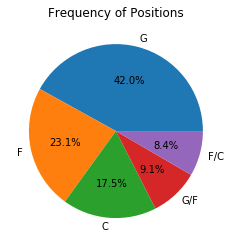

In [62]:
wnba['Pos'].value_counts().plot.pie(title = "Frequency of Positions",autopct = '%.1f%%')

#remove label
plt.ylabel("")

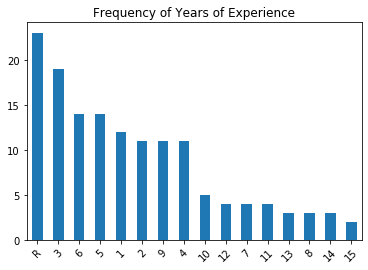

In [63]:
wnba['Experience'].value_counts().plot.bar(rot = 45, title = "Frequency of Years of Experience")

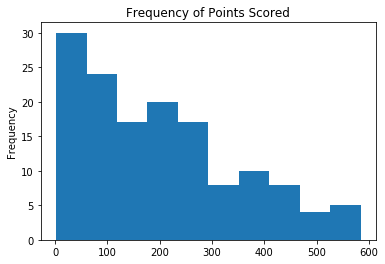

In [64]:
wnba['PTS'].plot.hist(title = "Frequency of Points Scored")

(1.417, 60.2]     30
(60.2, 118.4]     24
(118.4, 176.6]    17
(176.6, 234.8]    20
(234.8, 293.0]    17
(293.0, 351.2]     8
(351.2, 409.4]    10
(409.4, 467.6]     8
(467.6, 525.8]     4
(525.8, 584.0]     5
Name: PTS, dtype: int64


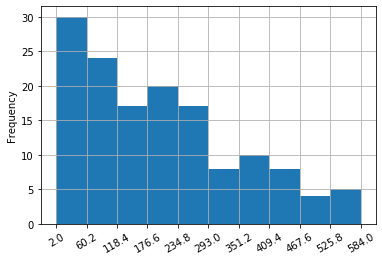

In [65]:
print(wnba['PTS'].value_counts(bins = 10).sort_index())

from numpy import arange
wnba['PTS'].plot.hist(grid = True, xticks = arange(2,585,58.2), rot = 30)

Looking on the histogram above, we can extract the same information as from the grouped frequency table. We can see that there are 20 players in the interval (176.6, 234.8], 10 players in the interval (351.2, 409.4], etc.

In [66]:
wnba['PTS'].describe()

count    143.000000
mean     201.790210
std      153.381548
min        2.000000
25%       75.000000
50%      177.000000
75%      277.500000
max      584.000000
Name: PTS, dtype: float64

From the output of wnba['PTS'].describe() we can see that most of the values (75%) are distributed within a relatively narrow interval (between 2 and 277). This tells us that:

1. The values are distributed unevenly across the 2 - 584 range (2 is the minimum value in the PTS variable, and 584 is the maximum).
2. Most values are clustered in the first (left) part of the the distribution's range.

We can immediately see the same two patterns on the histogram above:

1. The distribution of values is uneven, with each class interval having a different frequency. If the distribution was even, all the class intervals would have the same frequency.
2. Most values (roughly three quarters) are clustered in the left half of the histogram.

count    143.000000
mean      24.356643
std        7.104259
min        2.000000
25%       22.000000
50%       27.000000
75%       29.000000
max       32.000000
Name: Games Played, dtype: float64


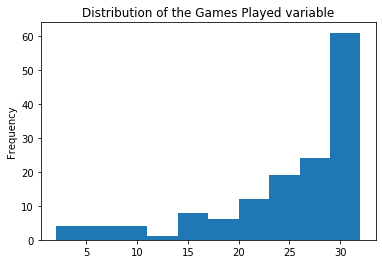

In [67]:
print(wnba["Games Played"].describe())

wnba["Games Played"].plot.hist(title = "Distribution of the Games Played variable")

We can see that 25% are in the higher end are closer to 30 games played. Meaning it is saturated on the higher end with players consistently playing.

For nominal variables, values can't be numerically adjacent in principle, and we add gaps to emphasize that the values are fundamentally distinct.

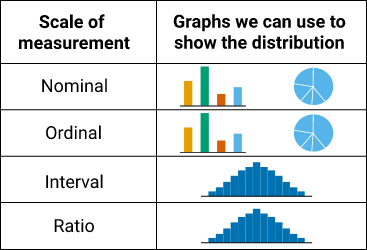

Text(0.5, 0, 'Games played')

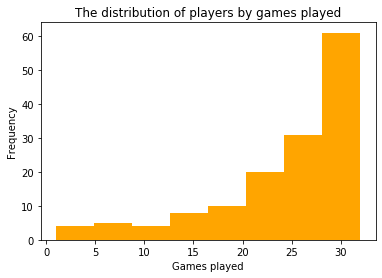

In [72]:
# Customize histogram for the Games Played
wnba["Games Played"].plot.hist(range = (1,32),bins = 8, title = "The distribution of players by games played", color = 'orange')
plt.xlabel("Games played")

1. Most values pile up toward the endpoint of the range (32 games played).
2. There are less and less values toward the opposite end (0 games played).

## Comparing Frequency Distributions
### Creating a new ordinal chart

In [105]:
#function to define levels of Points

wnba["Experience"] = wnba["Experience"].replace("R", 0)
wnba["Experience"] =pd.to_numeric(wnba["Experience"])

def make_exp_ordinal(row):
    if row['Experience'] < 1:
        return 'Rookie'
    if (row['Experience'] <=  3):
        return 'Little experience'
    if (row['Experience'] <=  5):
        return 'Experienced'
    if (row['Experience'] <=  10):
        return 'Very experienced'
    if (row['Experience'] >  10):
        return 'Veteran'
    else:
        return NaN
    
# #new column with new function applied
wnba['Exp_ordinal'] = wnba.apply(make_exp_ordinal, axis = 1)
wnba['Exp_ordinal'].value_counts()

Little experience    42
Very experienced     37
Experienced          25
Rookie               23
Veteran              16
Name: Exp_ordinal, dtype: int64

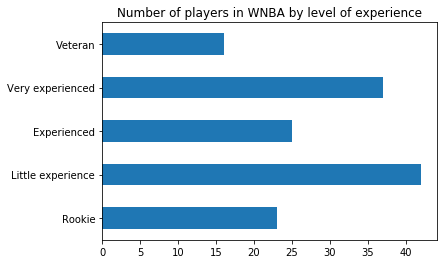

In [106]:
wnba["Exp_ordinal"].value_counts().iloc[[3,0,2,1,4]].plot.barh(title = "Number of players in WNBA by level of experience")

In [107]:
#segment and generate a frequency distribution

rookies = wnba[wnba['Exp_ordinal'] == 'Rookie']
little_xp = wnba[wnba['Exp_ordinal'] == 'Little experience']
experienced = wnba[wnba['Exp_ordinal'] == 'Experienced']
very_xp = wnba[wnba['Exp_ordinal'] == 'Very experienced']
veterans =  wnba[wnba['Exp_ordinal'] == 'Veteran']
rookie_distro = rookies['Pos'].value_counts()
little_xp_distro = little_xp['Pos'].value_counts()
experienced_distro = experienced['Pos'].value_counts()
very_xp_distro = very_xp['Pos'].value_counts()
veteran_distro = veterans['Pos'].value_counts()

print(rookie_distro, '\n\n', 
      little_xp_distro, '\n\n',
      experienced_distro, '\n\n',
      very_xp_distro, '\n\n',
      veteran_distro)

G      14
C       4
F       4
F/C     1
Name: Pos, dtype: int64 

 G      14
F      13
C       8
F/C     4
G/F     3
Name: Pos, dtype: int64 

 G      9
C      6
F      6
F/C    2
G/F    2
Name: Pos, dtype: int64 

 G      16
C       6
F       6
G/F     5
F/C     4
Name: Pos, dtype: int64 

 G      7
F      4
G/F    3
C      1
F/C    1
Name: Pos, dtype: int64


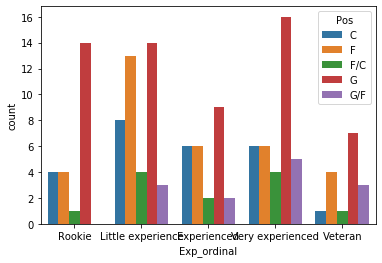

In [118]:
#generate a grouped bar plot similar
sns.countplot(x = "Exp_ordinal",
              hue = "Pos",
              data = wnba,
              order = ['Rookie', 'Little experience', "Experienced", "Very experienced", "Veteran"],
              hue_order = ['C', 'F', 'F/C', 'G', 'G/F'])

--------------------------------------------------------------------------------------------------------------------------

When players get past a certain age, they become less and less physically fit as they get older. Intuitively, the fitness level of a player should directly affect how much she plays in a season. On average, a WNBA player played approximately 497 minutes in the 2016-2017 season:


In [119]:
print(wnba['MIN'].mean())

496.97202797202794


Let's hypothesize that older players generally play less than this average of 497 minutes, while younger players generally play more. As a benchmark to distinguish between younger and older players, we'll take the mean age of players in our sample, which is approximately 27:



In [120]:
print(wnba['Age'].mean())

27.076923076923077


To test our hypothesis, we can generate a grouped bar plot to examine the frequency distribution of younger and older players that played under the average or as much as the average or above. 

In [121]:
#If the player is 27 or over, we'll label her "old", otherwise the label is "young"
wnba['age_mean_relative'] = wnba['Age'].apply(lambda x: 'old' if x >= 27 else 'young')

In [123]:
# If a player played 497 minutes or more, we'll assign her the label "average or above", otherwise we'll assign "below average"
wnba['min_mean_relative'] = wnba["MIN"].apply(lambda x: "average or above" if x>= 497 else "below average")

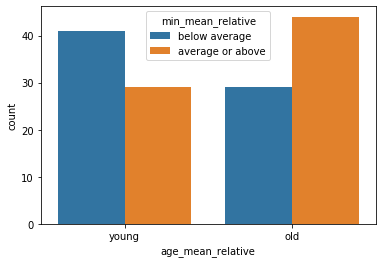

In [124]:
sns.countplot(x = "age_mean_relative", 
              hue = "min_mean_relative",
             data = wnba)

Contrary to what our hypothesis predicted, the grouped bar plot we built showed that among old players the "average or above" category is the most numerous. Among young players we saw an opposite pattern: there are more players who played below the average number of minutes.

We can see that more old players belong to the "average or above" category than to "below average", but we can't tell, for instance, whether old players generally play much more than the average. For all we know, they could have all played exactly 497 minutes (which is the average).

The min_mean_relative variable is ordinal, and it was derived from the MIN variable, which is measured on a ratio scale. The information provided by the MIN variable is much more granular, and we can plot the distribution of this variable instead. Because the MIN variable is measured on a ratio scale, we'll need to use histograms instead of bar plots.


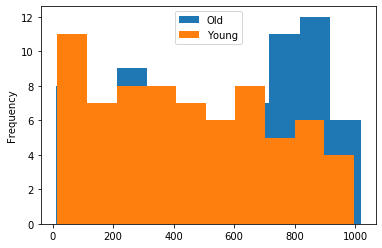

In [125]:
wnba[wnba.Age >= 27]['MIN'].plot.hist(label = 'Old', legend = True)
wnba[wnba.Age < 27]['MIN'].plot.hist(label = 'Young', legend = True)

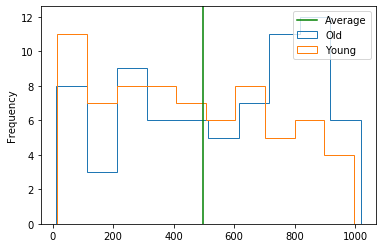

In [129]:
wnba[wnba.Age >= 27]['MIN'].plot.hist(histtype = 'step', label = 'Old', legend = True)
wnba[wnba.Age < 27]['MIN'].plot.hist(histtype = 'step', label = 'Young', legend = True)
plt.axvline(497, label = "Average", color = "green")
plt.legend()

We can now see that most of the old players that belong to the "average or above" category play significantly more than average. 

### Density Plot

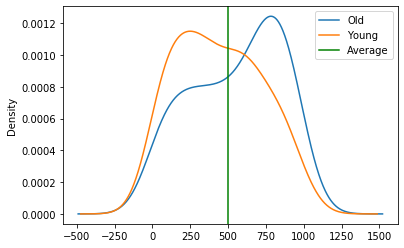

In [131]:
wnba[wnba["Age"] >= 27]["MIN"].plot.kde(label = "Old", legend = "True")
wnba[wnba["Age"] < 27]["MIN"].plot.kde(label = "Young", legend = "True")
plt.axvline(497, label = "Average", color = "green")
plt.legend()

Each of the smoothed histograms above is called a kernel density estimate plot or, shorter, kernel density plot. Unlike histograms, kernel density plots display densities on the y-axis instead of frequencies. The density values are actually probability values — which we'll be able to understand more about after the probability courses.

We can still observe that most of the old players that belong to the "average or above" category play significantly more than average. With the help of the vertical line, the pattern is very easy to notice. Because the graph looks much cleaner than the one with step-type histograms, we can easily argue that the pattern is much more obvious in the case of kernel density plots.

Determining whether centers are generally taller than forwards, whether forwards are generally shorter than guards, and so on. In the code below, we'll segment the data set by player position, and for each segment we'll generate a kernel density plot for the distribution of the Height variable:

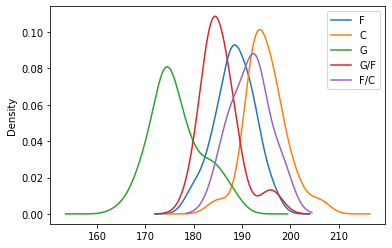

In [132]:
wnba[wnba.Pos == 'F']['Height'].plot.kde(label = 'F', legend = True)
wnba[wnba.Pos == 'C']['Height'].plot.kde(label = 'C', legend = True)
wnba[wnba.Pos == 'G']['Height'].plot.kde(label = 'G', legend = True)
wnba[wnba.Pos == 'G/F']['Height'].plot.kde(label = 'G/F', legend = True)
wnba[wnba.Pos == 'F/C']['Height'].plot.kde(label = 'F/C', legend = True)

If we look very closely, we can see a couple of clear patterns: the shortest players are generally guards, the tallest players are generally centers, mid-height players are generally forwards or play in a combined position, etc.

### Stripplots

This is one alternative we can use to visualize the distribution of heights as a function of player position:



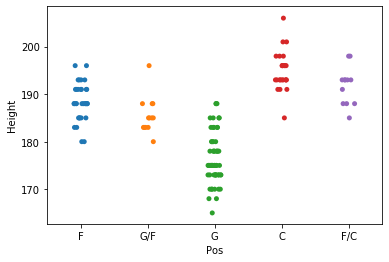

In [136]:
# check height variable
sns.stripplot(x = 'Pos',
              y = 'Height',
              data = wnba,
              jitter = True)

Patterns are now immediately visible. We can see on the graph that the shortest players are guards — in fact, all players under 180 cm are guards. The tallest players are centers — this is the only category with players above 2 meters. Among combined positions, we can see that F/C has slightly taller representatives — most likely because it requires center qualities (and we've seen that the tallest players are generally centers).

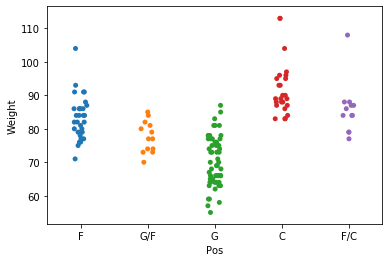

In [137]:
# check weight variable
sns.stripplot(x = "Pos",
              y = "Weight",
              jitter = True,
              data = wnba)

The patterns we see are strikingly similar to those we saw for heights. This can be easily explained by the fact that there's a strong positive relation between a player's height and her weight: the taller the player, the heavier she is; the shorter the player, the lighter she is.

### Boxplots

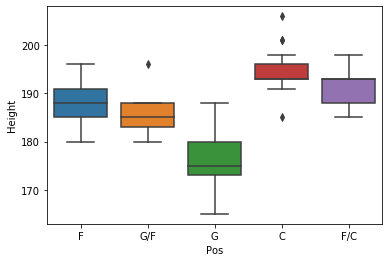

In [138]:
# height
sns.boxplot(x = 'Pos', y = 'Height', data = wnba)

The few dots we see for the box plots of centers and guards/forwards (G/F) represent values in the distribution that are much larger or much lower than the rest of the values. A value that is much lower or much larger than the rest of the values in a distribution is a outlier.

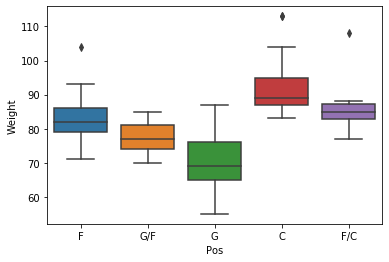

In [140]:
# weight
sns.boxplot(x = 'Pos', y = 'Weight', data = wnba)

A value is an outlier if:

It's larger than the upper quartile by 1.5 times the difference between the upper quartile and the lower quartile (the difference is also called the interquartile range).
It's lower than the lower quartile by 1.5 times the difference between the upper quartile and the lower quartile (the difference is also called the interquartile range).

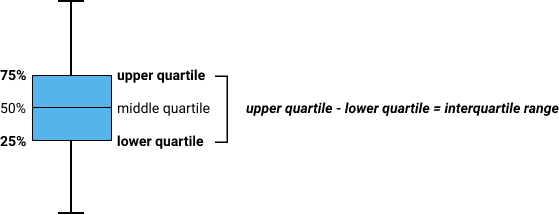

In [141]:
wnba[wnba['Pos'] == 'C']['Height'].describe()

count     25.000000
mean     194.920000
std        4.132392
min      185.000000
25%      193.000000
50%      193.000000
75%      196.000000
max      206.000000
Name: Height, dtype: float64

From the output of wnba[wnba['Pos'] == 'C']['Height'].describe(), we can see that the upper quartile (the 75th percentile) is 196 and the lower quartile (the 25th percentile) is 193. Hence, the interquartile range is 3.

        interquartile range = 196 - 193 = 3
        
Every value that is 3 x 1.5 bigger than the upper quartile is considered an outlier 4.5, and the upper quartile is 196. This means that any value greater than 196 + 4.5 is considered an outlier.

Similarly, every value that is 4.5 lower that the lower quartile is an outlier, and the lower quartile is 193. This means that any value less than 193 - 4.5 is an outlier.

12
0


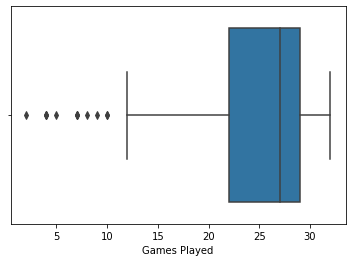

In [143]:
#interquartile range
iqr = 29 - 22

lower_bound = 22 - (iqr * 1.5)
upper_bound = 29 + (iqr * 1.5)

#number of outliers
outliers_low = print(sum(wnba["Games Played"] < lower_bound))
outliers_high = print(sum(wnba["Games Played"] > upper_bound))

#check using box plot for outliers
sns.boxplot(wnba["Games Played"])

We can see that there are no outliers on the upper end which is correct based on our manual calculations as well. We see there are a lot of outliers on the lower side but we can't determine how much for sure.